In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
from pathlib import Path
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random

In [2]:
image_path=Path("data/PizzaSteakSushi")

In [3]:
train_images=list(image_path.glob("train/*/*.jpg"))

In [4]:
train_images

[WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/101833.jpg'),
 WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/102896.jpg'),
 WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/10340.jpg'),
 WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/104874.jpg'),
 WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/105113.jpg'),
 WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/108559.jpg'),
 WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/11207.jpg'),
 WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/115224.jpg'),
 WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/116147.jpg'),
 WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/118163.jpg'),
 WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/118944.jpg'),
 WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/124904.jpg'),
 WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/127152.jpg'),
 WindowsPath('data/PizzaSteakSushi/train/Chicken Curry/128873.jpg'),
 WindowsPath('data/PizzaSteakSushi/t

In [5]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

Chicken Curry


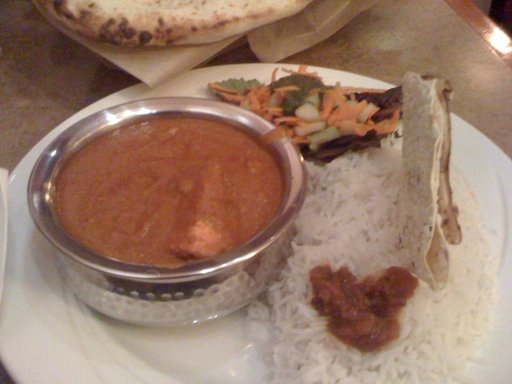

In [6]:
random_image_path=random.choice(train_images)
img=Image.open(random_image_path)
img_class=random_image_path.parent.stem
print(img_class)
img

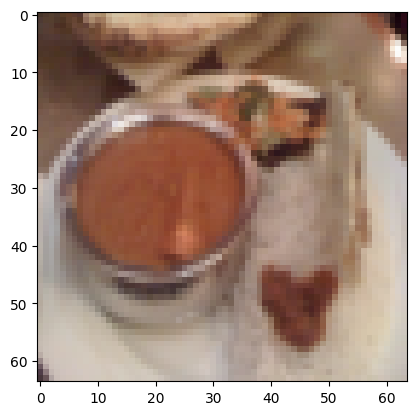

In [7]:
transformed_img=data_transform(img)
numpy_img=transformed_img.permute(1,2,0).numpy()
plt.imshow(numpy_img)

In [8]:
image_path

WindowsPath('data/PizzaSteakSushi')

In [9]:
train_path=Path("data/PizzaSteakSushi/train")
test_path=Path("data/PizzaSteakSushi/test")

In [10]:
train_data=datasets.ImageFolder(root=train_path,transform=data_transform,target_transform=None)
test_data=datasets.ImageFolder(root=test_path,transform=data_transform)

In [11]:
train_data.classes

['Chicken Curry', 'Fried Rice', 'Samosa']

In [12]:
test_data.classes

['Chicken Curry', 'Fried Rice', 'Samosa']

In [13]:
len(train_data),len(test_data)

(288, 112)

In [14]:
img,label=train_data[3][0],train_data[3][1]

In [15]:
img,label

(tensor([[[0.3451, 0.3608, 0.3412,  ..., 0.6510, 0.6471, 0.6431],
          [0.3647, 0.3569, 0.3647,  ..., 0.6627, 0.6549, 0.6510],
          [0.3725, 0.4000, 0.3922,  ..., 0.6706, 0.6667, 0.6627],
          ...,
          [0.7216, 0.6941, 0.6627,  ..., 0.7137, 0.7020, 0.6941],
          [0.7294, 0.7059, 0.6667,  ..., 0.7098, 0.7020, 0.7020],
          [0.7412, 0.7137, 0.6706,  ..., 0.7059, 0.7020, 0.7059]],
 
         [[0.3098, 0.3333, 0.3098,  ..., 0.6745, 0.6667, 0.6667],
          [0.3412, 0.3255, 0.3373,  ..., 0.6745, 0.6667, 0.6667],
          [0.3451, 0.3647, 0.3608,  ..., 0.6745, 0.6745, 0.6784],
          ...,
          [0.7059, 0.6824, 0.6471,  ..., 0.7176, 0.7098, 0.7098],
          [0.7098, 0.6902, 0.6471,  ..., 0.7137, 0.7098, 0.7098],
          [0.7176, 0.6902, 0.6549,  ..., 0.7098, 0.7059, 0.7137]],
 
         [[0.2824, 0.3059, 0.2980,  ..., 0.6745, 0.6824, 0.6902],
          [0.2980, 0.2941, 0.3137,  ..., 0.6745, 0.6902, 0.6902],
          [0.2980, 0.3373, 0.3451,  ...,

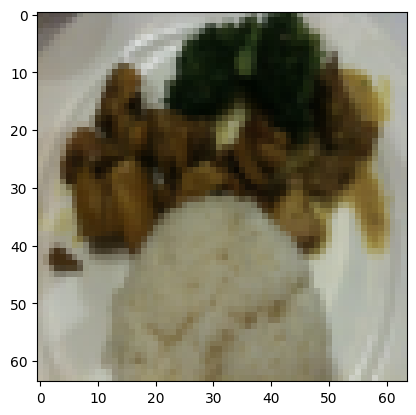

In [16]:
img_permute=img.permute(1,2,0)
plt.imshow(img_permute)

In [24]:
train_dataloader=DataLoader(train_data,1,True)
test_dataloader=DataLoader(test_data,1,True)

In [26]:
img,label=next(iter(train_dataloader))
img.shape
#4.8s on 1 worker
#0s on 0 workers

torch.Size([1, 3, 64, 64])